# Energy Forecasting - Data Preprocessing
This notebook contains the initial steps of the energy forecasting project, including:
- Loading the dataset
- Cleaning and handling missing values
- Resampling to hourly data
- Saving the processed dataset for modeling

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
file_path = '../data/raw.txt'
df = pd.read_csv(
    file_path,
    sep=';',
    parse_dates=[[0,1]],
    infer_datetime_format=True,
    na_values='?',
    low_memory=False
)
df.columns = ['Datetime', 'Global_active_power','Global_reactive_power','Voltage',
              'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']

df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

df.head()

In [12]:
df = df[['Global_active_power']].astype('float')
df.dropna(inplace=True)
df.isnull().sum()

Global_active_power    0
dtype: int64

In [13]:
df_hourly = df.resample('H').mean() #hourly recursive
df_hourly.head() #first few datas

/var/folders/z3/_55w_bvn49138t74d36fmr9c0000gn/T/ipykernel_19193/3836524327.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean() #hourly recursive


Global_active_power
Datetime                                
2006-12-16 17:00:00             4.222889
2006-12-16 18:00:00             3.632200
2006-12-16 19:00:00             3.400233
2006-12-16 20:00:00             3.268567
2006-12-16 21:00:00             3.056467

<Figure size 1400x500 with 0 Axes>

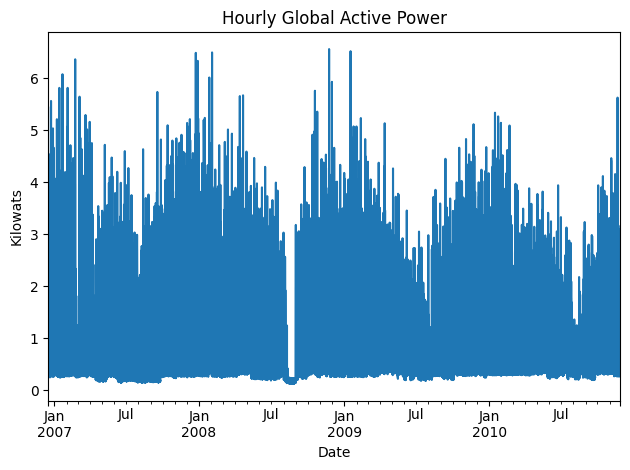

In [14]:
plt.figure(figsize=(14,5))
df_hourly.plot(title='Hourly Global Active Power',legend=False)
plt.ylabel('Kilowats')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [15]:
os.makedirs('../data/processed',exist_ok=True)
df_hourly.to_csv('../data/processed/hourly_power_consumption.csv')

# Summary
- Dataset loaded from raw `.txt` file  
- Cleaned missing values  
- Converted to hourly average consumption  
- Exported as CSV for modeling